In [2]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
from matplotlib import font_manager, rc
font_path= 'C:/Windows/Fonts/NGULIM.TTF'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

#### 통합 데이터 불러오기

In [4]:
df = pd.read_csv('../data_2/cow_체고0제거.csv') 
df.head()

,개월령,생시체중,근내평균,도체범위근내평균,체고,체장,형매도축수,형매도체평균,형매근내평균,형매근내평균가산,6개월내출산,농가근내평균,농가근내평균가산,근내EPD,근내,점수,농가구분,TARGET1
0,46,644.64,3.34,3.23,131.4,158.9,NaN,NaN,NaN,NaN,N,4.16,-1.05,0.18,6,4,농가소,0
1,46,633.93,4.59,4.52,129.7,148.4,NaN,NaN,NaN,NaN,Y,4.16,-1.05,0.17,4,3,농가소,0
2,32,567.86,5.50,4.89,130.3,158.0,NaN,NaN,NaN,NaN,N,5.58,0.53,0.42,7,5,농가소,1
3,33,564.29,6.13,5.56,130.7,155.9,NaN,NaN,NaN,NaN,Y,3.78,-0.91,0.42,2,2,농가소,0
4,48,692.86,4.79,4.61,131.2,146.1,NaN,NaN,NaN,NaN,Y,3.90,-1.35,0.82,4,3,농가소,0


###### 결측치 살펴보기

In [5]:
df_copy = df.copy()

# 변수명 변경
df_copy.columns = ['개월령', '생시체중', '근내평균', '도체범위근내평균', '체고', '체장', '형매도축수', '형매도체평균',
       '형매근내평균', '형매근내평균가산', '출산여부_6개월내', '농가근내평균', '농가근내평균가산', '근내EPD', '근내',
       '점수', '농가구분', 'TARGET1']

print(df_copy.isnull().sum()[6:13])
print('\n')
a = df_copy[df_copy['농가근내평균'].isnull()==False].copy()
print(a.isnull().sum()[6:10])
print(f'농가 결측 행 제거한 형매 결측 행:{71577-23541}')
print(df_copy[(df_copy['농가근내평균'].isnull())&(df_copy['형매도축수'].isnull()==False)].isnull().sum())
df_copy[(df_copy['농가근내평균'].isnull())&(df_copy['형매도축수'].isnull()==False)]

형매도축수        71577
형매도체평균       71577
형매근내평균       71577
형매근내평균가산     71577
출산여부_6개월내        0
농가근내평균       23541
농가근내평균가산     23541
dtype: int64


형매도축수       55263
형매도체평균      55263
형매근내평균      55263
형매근내평균가산    55263
dtype: int64
농가 결측 행 제거한 형매 결측 행:48036
개월령             0
생시체중            0
근내평균            0
도체범위근내평균        0
체고              0
체장              0
형매도축수           0
형매도체평균          0
형매근내평균          0
형매근내평균가산        0
출산여부_6개월내       0
농가근내평균       7227
농가근내평균가산     7227
근내EPD           0
근내              0
점수              0
농가구분            0
TARGET1         0
dtype: int64


,개월령,생시체중,근내평균,도체범위근내평균,체고,체장,형매도축수,형매도체평균,형매근내평균,형매근내평균가산,출산여부_6개월내,농가근내평균,농가근내평균가산,근내EPD,근내,점수,농가구분,TARGET1
8,33,639.29,5.67,5.89,131.3,154.0,6.0,460.83,6.50,0.49,N,NaN,NaN,0.30,6,4,농가소,0
21,57,728.57,4.42,4.51,133.8,148.3,2.0,412.00,7.00,1.19,Y,NaN,NaN,0.33,2,2,농가소,0
69,60,764.29,4.69,5.00,135.9,159.3,2.0,473.50,7.50,0.64,Y,NaN,NaN,0.17,6,3,농가소,0
83,59,569.64,4.86,4.60,135.9,159.3,2.0,424.00,6.00,0.44,Y,NaN,NaN,0.40,6,4,농가소,0
110,58,814.29,5.13,5.71,132.7,149.1,3.0,397.00,4.00,-2.19,Y,NaN,NaN,0.43,4,3,농가소,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99793,32,706.00,4.72,5.42,132.4,157.6,5.0,445.20,4.80,-0.49,N,NaN,NaN,0.15,1,1,우시장소,0
99797,33,649.00,4.93,5.07,129.3,144.5,2.0,372.50,5.00,0.10,N,NaN,NaN,0.03,4,3,우시장소,0
99805,31,665.00,4.05,4.12,133.9,155.4,2.0,451.50,7.00,0.65,N,NaN,NaN,-0.05,9,5,우시장소,1
99818,30,760.00,6.00,6.80,131.6,150.3,2.0,401.00,4.50,-1.62,N,NaN,NaN,0.27,6,4,우시장소,0


##### train_test_split 7:3

###### 결측치 채우고 난 후

In [6]:
df_fill = df_copy.copy()
df_fill = df_fill.fillna(0)
print(f"체고 0 인거:{df_fill[df_fill['체고']==0]}")
print(len(df_fill))
df_fill.isna().sum()

체고 0 인거:Empty DataFrame
Columns: [개월령, 생시체중, 근내평균, 도체범위근내평균, 체고, 체장, 형매도축수, 형매도체평균, 형매근내평균, 형매근내평균가산, 출산여부_6개월내, 농가근내평균, 농가근내평균가산, 근내EPD, 근내, 점수, 농가구분, TARGET1]
Index: []
99848


개월령          0
생시체중         0
근내평균         0
도체범위근내평균     0
체고           0
체장           0
형매도축수        0
형매도체평균       0
형매근내평균       0
형매근내평균가산     0
출산여부_6개월내    0
농가근내평균       0
농가근내평균가산     0
근내EPD        0
근내           0
점수           0
농가구분         0
TARGET1      0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

X = df_fill.drop(['TARGET1'],axis=1)
Y = df_fill.TARGET1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 2023)

print(f'데이터 셋 70%:{df_fill.shape[0]*0.7}')
print(f'데이터 셋 30%:{df_fill.shape[0]*0.3}')

train = pd.concat([X_train,Y_train], axis=1)
test = pd.concat([X_test,Y_test], axis=1)

print(f'train set:{train.shape[0]}')
print(f'test set:{test.shape[0]}')

데이터 셋 70%:69893.59999999999
데이터 셋 30%:29954.399999999998
train set:69893
test set:29955


In [8]:
model = sm.Logit.from_formula(""" TARGET1 ~ 개월령+ 생시체중+ 
근내평균+도체범위근내평균+체고+체장+형매도축수+형매도체평균+
형매근내평균+형매근내평균가산+C(출산여부_6개월내)
+농가근내평균+농가근내평균가산+근내EPD
+C(농가구분) """, train).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.348212
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                TARGET1   No. Observations:                69893
Model:                          Logit   Df Residuals:                    69877
Method:                           MLE   Df Model:                           15
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                  0.1748
Time:                        22:28:05   Log-Likelihood:                -24338.
converged:                       True   LL-Null:                       -29492.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -5.1888      0.653     -7.947      0.000      -6.469      -3.909
C(출산여부_6개월내)[T.Y]    -0.3949      0.029    -13.502      0.000      -0.452      -0.338
C(농가구분)[T.우시장소]       0.3165      0.044      7.264      0.000       0.231       0.402
개월령                  -0.0043      0.002     -2.518      0.012      -0.008      -0.001
생시체중                  0.0009      0.000      4.496      0.000       0.000       0.001
근내평균                  0.0827      0.033      2.508      0.012       0.018       0.147
도체범위근내평균              0.7978      0.025     31.780      0.000       0.749       0.847
체고                   -0.0211      0.007     -3.202      0.001      -0.034      -0.008
체장                    0.0097      0.003      2.830      0.005       0.003       0.016
형매도축수                -0.0158      0.015     -1.057      0.290      -0.045       0.014
형매도체평균               -0.0025      0.001     -4.798      0.000      -0.004      -0.001
형매근내평균                0.1655      0.040      4.162      0.000       0.088       0.244
형매근내평균가산              0.1103      0.041      2.660      0.008       0.029       0.192
농가근내평균               -0.0334      0.005     -6.497      0.000      -0.043      -0.023
농가근내평균가산              0.5324      0.016     33.114      0.000       0.501       0.564
근내EPD                 0.6719      0.060     11.125      0.000       0.554       0.790
=====================================================================================
"""

In [9]:
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

,OR,Lower CI,Upper CI
Intercept,0.005578,0.001551,0.020059
C(출산여부_6개월내)[T.Y],0.673724,0.636187,0.713477
C(농가구분)[T.우시장소],1.372296,1.259970,1.494636
개월령,0.995728,0.992415,0.999052
생시체중,1.000880,1.000496,1.001263
근내평균,1.086176,1.018220,1.158668
도체범위근내평균,2.220567,2.113960,2.332550
체고,0.979085,0.966501,0.991833
체장,1.009704,1.002973,1.016480
형매도축수,0.984282,0.955796,1.013616


In [10]:
test_copy = test.copy()

pred_y = model.predict(test_copy)

test_copy['probability'] = pred_y

print(test.head())
print(test_copy.head())
print(len(test_copy))

       개월령    생시체중  근내평균  도체범위근내평균     체고     체장  형매도축수  형매도체평균  형매근내평균  \
63088   60  587.50  4.41      3.70  134.7  159.7    2.0  471.00    8.00   
78378   33  741.07  3.82      4.88  131.1  152.9    0.0    0.00    0.00   
31539   60  671.43  4.25      4.43  132.7  145.3    0.0    0.00    0.00   
90009   34  669.64  4.85      5.22  133.2  158.1    0.0    0.00    0.00   
82134   54  635.71  4.09      3.98  133.5  157.0    7.0  391.86    3.57   

       형매근내평균가산 출산여부_6개월내  농가근내평균  농가근내평균가산  근내EPD  근내  점수 농가구분  TARGET1  
63088      2.41         N    2.29     -2.34   0.06   6   4  농가소        0  
78378      0.00         N    6.19      0.82   0.19   4   3  농가소        0  
31539      0.00         N    0.00      0.00   0.33   6   4  농가소        0  
90009      0.00         N    0.00      0.00   0.44   8   5  농가소        1  
82134     -1.35         Y    6.30      1.21  -0.13   3   2  농가소        0  
       개월령    생시체중  근내평균  도체범위근내평균     체고     체장  형매도축수  형매도체평균  형매근내평균  \
63088   60  587.50  4.41

In [11]:
def performance(TP,TN,FP,FN,BETA):
    
    N = TP+TN+FP+FN
    
    Sensitivity=(TP/(TP+FN))*100
    Sensitivity_l=(Sensitivity/100-1.96*math.sqrt( (Sensitivity/100)*(1-(Sensitivity/100))/(TP+FN) ) )*100
    Sensitivity_u=(Sensitivity/100+1.96*math.sqrt( (Sensitivity/100)*(1-(Sensitivity/100))/(TP+FN) ) )*100

    Specificity=(1-FP/(TN+FP))*100
    Specificity_l=(Specificity/100-1.96*math.sqrt( (Specificity/100)*(1-(Specificity/100))/(FP+TN) ) )*100
    Specificity_u=(Specificity/100+1.96*math.sqrt( (Specificity/100)*(1-(Specificity/100))/(FP+TN) ) )*100

    Accuracy=((TP+TN)/(TP+TN+FP+FN))*100
    Accuracy_l=(Accuracy/100-1.96*math.sqrt( (Accuracy/100)*(1-(Accuracy/100))/N ) )*100
    Accuracy_u=(Accuracy/100+1.96*math.sqrt( (Accuracy/100)*(1-(Accuracy/100))/N ) )*100

    PPV= (TP/(TP+FP))*100 
    PPV_l=(PPV/100-1.96*math.sqrt( (PPV/100)*(1-(PPV/100))/(TP+FP) ) )*100
    PPV_u=(PPV/100+1.96*math.sqrt( (PPV/100)*(1-(PPV/100))/(TP+FP) ) )*100

    NPV= (TN/(TN+FN))*100 
    NPV_l=(NPV/100-1.96*math.sqrt( (NPV/100)*(1-(NPV/100))/(TN+FN) ) )*100
    NPV_u=(NPV/100+1.96*math.sqrt( (NPV/100)*(1-(NPV/100))/(TN+FN) ) )*100
    
    F_beta_score = (PPV*Sensitivity)/(BETA*(PPV+Sensitivity))
    
    result = {
        'Metric': ['Sensitivity', 'Specificity', 'Accuracy', 'PPV', 'NPV', f'F_{BETA}_score'],
        'Value': [Sensitivity, Specificity, Accuracy, PPV, NPV, F_beta_score],
        'CI_Lower': [Sensitivity_l, Specificity_l, Accuracy_l, PPV_l, NPV_l, None],
        'CI_Upper': [Sensitivity_u, Specificity_u, Accuracy_u, PPV_u, NPV_u, None]
    }
    
    result_2 = pd.DataFrame(result)
    
    return result_2

In [12]:
test_copy['prob_5'] = test_copy['probability'].apply(lambda x: 1 if 0.5<= x else 0 if 0<x<5 else x)
test_copy['prob_6'] = test_copy['probability'].apply(lambda x: 1 if 0.6<= x else 0 if 0<x<6 else x)
test_copy['prob_7'] = test_copy['probability'].apply(lambda x: 1 if 0.7<= x else 0 if 0<x<7 else x)
test_copy['prob_8'] = test_copy['probability'].apply(lambda x: 1 if 0.8<= x else 0 if 0<x<8 else x)
test_copy['prob_9'] = test_copy['probability'].apply(lambda x: 1 if 0.9<= x else 0 if 0<x<9 else x)

In [13]:
print(len(test_copy[test_copy['prob_5'].isnull()==False]))
print(len(test_copy[test_copy['prob_6'].isnull()==False]))
print(len(test_copy[test_copy['prob_7'].isnull()==False]))
print(len(test_copy[test_copy['prob_8'].isnull()==False]))
print(len(test_copy[test_copy['prob_9'].isnull()==False]))

29955
29955
29955
29955
29955


In [14]:
print(f"5이상개수:{len(test_copy[test_copy['점수']==5])}")
print(f"TARGET1개수:{len(test_copy[test_copy['TARGET1']==1])}")
print('========================================='*2)
print(f"0.5이상개수:{len(test_copy[test_copy['probability']>=0.5])}")
print(f"prob_5개수:{len(test_copy[test_copy['prob_5']==1])}")
print('========================================='*2)
print(f"0.6이상개수:{len(test_copy[test_copy['probability']>=0.6])}")
print(f"prob_6개수:{len(test_copy[test_copy['prob_6']==1])}")
print('========================================='*2)
print(f"0.7이상개수:{len(test_copy[test_copy['probability']>=0.7])}")
print(f"prob_7개수:{len(test_copy[test_copy['prob_7']==1])}")
print('========================================='*2)
print(f"0.8이상개수:{len(test_copy[test_copy['probability']>=0.8])}")
print(f"prob_8개수:{len(test_copy[test_copy['prob_8']==1])}")
print('========================================='*2)
print(f"0.9이상개수:{len(test_copy[test_copy['probability']>=0.9])}")
print(f"prob_9개수:{len(test_copy[test_copy['prob_9']==1])}")

5이상개수:4568
TARGET1개수:4568
0.5이상개수:1080
prob_5개수:1080
0.6이상개수:494
prob_6개수:494
0.7이상개수:194
prob_7개수:194
0.8이상개수:46
prob_8개수:46
0.9이상개수:7
prob_9개수:7


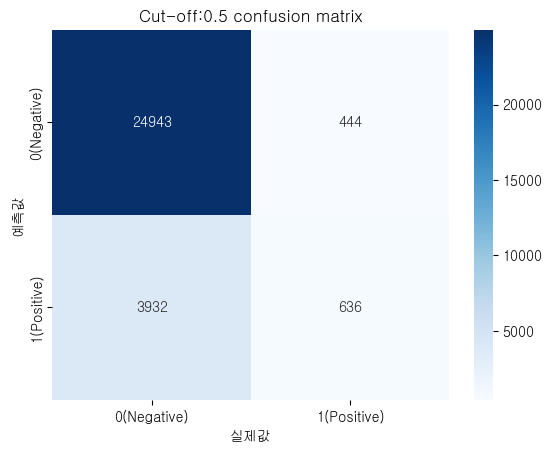

True Positive:636
True Negative:24943
False Positive:444
False Negative:3932


,Metric,Value,CI_Lower,CI_Upper
0,Sensitivity,13.922942,12.919015,14.926869
1,Specificity,98.251073,98.089821,98.412325
2,Accuracy,85.391420,84.991446,85.791395
3,PPV,58.888889,55.954346,61.823432
4,NPV,86.382684,85.987086,86.778282
5,F_1_score,11.260623,NaN,NaN


In [15]:
# cut-off 0.5
cm = confusion_matrix(test_copy['TARGET1'], test_copy['prob_5'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('Cut-off:0.5 confusion matrix')
plt.xticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.yticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.show()

print(f"True Positive:{len(test_copy[(test_copy['prob_5']==1)&(test_copy['TARGET1']==1)])}")
print(f"True Negative:{len(test_copy[(test_copy['prob_5']==0)&(test_copy['TARGET1']==0)])}")
print(f"False Positive:{len(test_copy[(test_copy['prob_5']==1)&(test_copy['TARGET1']==0)])}")
print(f"False Negative:{len(test_copy[(test_copy['prob_5']==0)&(test_copy['TARGET1']==1)])}")

performance(TP=636,TN=24943,FP=444,FN=3932,BETA=1)

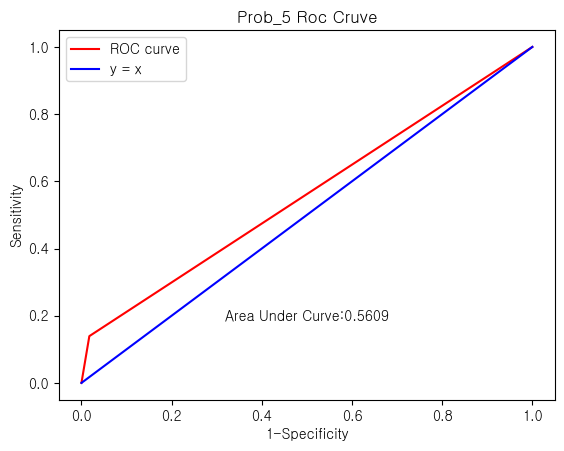

In [16]:
# roc curve, auc
fpr, tpr, thresholds = roc_curve(test_copy['TARGET1'], test_copy['prob_5'])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(test_copy['TARGET1'], test_copy['prob_5'])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('Prob_5 Roc Cruve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

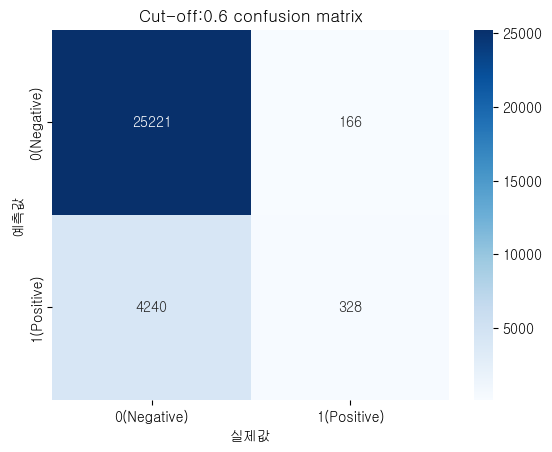

True Positive:328
True Negative:25221
False Positive:166
False Negative:4240


,Metric,Value,CI_Lower,CI_Upper
0,Sensitivity,7.180385,6.431722,7.929049
1,Specificity,99.346122,99.246976,99.445268
2,Accuracy,85.291270,84.890162,85.692378
3,PPV,66.396761,62.231362,70.562160
4,NPV,85.608092,85.207272,86.008912
5,F_1_score,6.479652,NaN,NaN


In [18]:
# cut-off 0.6
cm = confusion_matrix(test_copy['TARGET1'], test_copy['prob_6'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('Cut-off:0.6 confusion matrix')
plt.xticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.yticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.show()

print(f"True Positive:{len(test_copy[(test_copy['prob_6']==1)&(test_copy['TARGET1']==1)])}")
print(f"True Negative:{len(test_copy[(test_copy['prob_6']==0)&(test_copy['TARGET1']==0)])}")
print(f"False Positive:{len(test_copy[(test_copy['prob_6']==1)&(test_copy['TARGET1']==0)])}")
print(f"False Negative:{len(test_copy[(test_copy['prob_6']==0)&(test_copy['TARGET1']==1)])}")

performance(TP=328,TN=25221,FP=166,FN=4240,BETA=1)

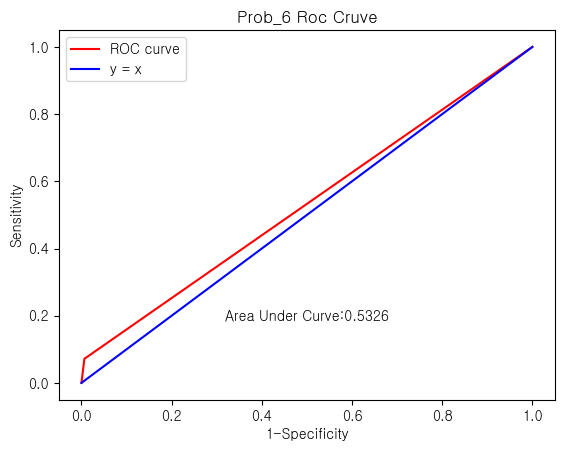

In [17]:
# roc curve, auc
fpr, tpr, thresholds = roc_curve(test_copy['TARGET1'], test_copy['prob_6'])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(test_copy['TARGET1'], test_copy['prob_6'])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('Prob_6 Roc Cruve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

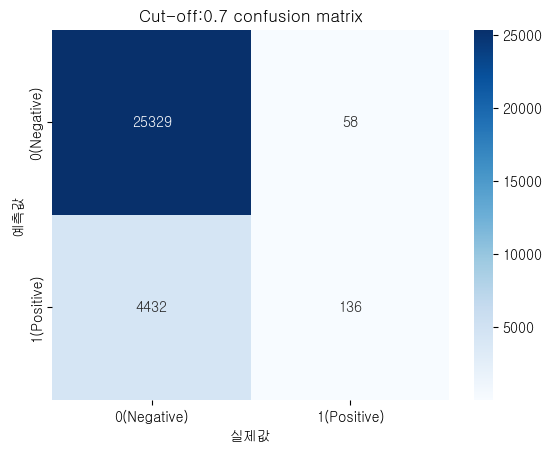

True Positive:136
True Negative:25329
False Positive:58
False Negative:4432


,Metric,Value,CI_Lower,CI_Upper
0,Sensitivity,2.977233,2.484359,3.470107
1,Specificity,99.771537,99.712806,99.830267
2,Accuracy,85.010850,84.606602,85.415097
3,PPV,70.103093,63.660852,76.545333
4,NPV,85.108027,84.703550,85.512504
5,F_1_score,2.855943,NaN,NaN


In [20]:
# cut-off 0.7
cm = confusion_matrix(test_copy['TARGET1'], test_copy['prob_7'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('Cut-off:0.7 confusion matrix')
plt.xticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.yticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.show()

print(f"True Positive:{len(test_copy[(test_copy['prob_7']==1)&(test_copy['TARGET1']==1)])}")
print(f"True Negative:{len(test_copy[(test_copy['prob_7']==0)&(test_copy['TARGET1']==0)])}")
print(f"False Positive:{len(test_copy[(test_copy['prob_7']==1)&(test_copy['TARGET1']==0)])}")
print(f"False Negative:{len(test_copy[(test_copy['prob_7']==0)&(test_copy['TARGET1']==1)])}")

performance(TP=136,TN=25329,FP=58,FN=4432,BETA=1)

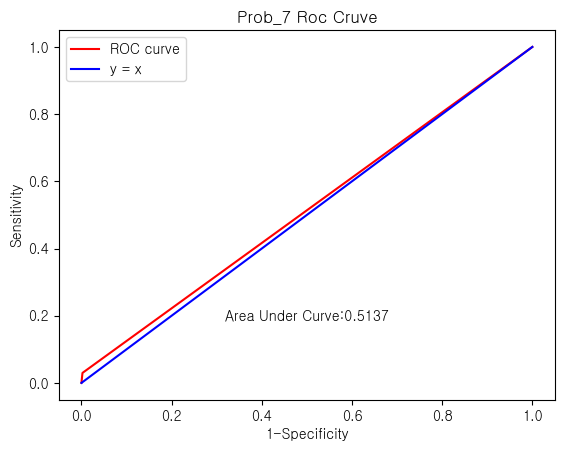

In [18]:
# roc curve, auc
fpr, tpr, thresholds = roc_curve(test_copy['TARGET1'], test_copy['prob_7'])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(test_copy['TARGET1'], test_copy['prob_7'])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('Prob_7 Roc Cruve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

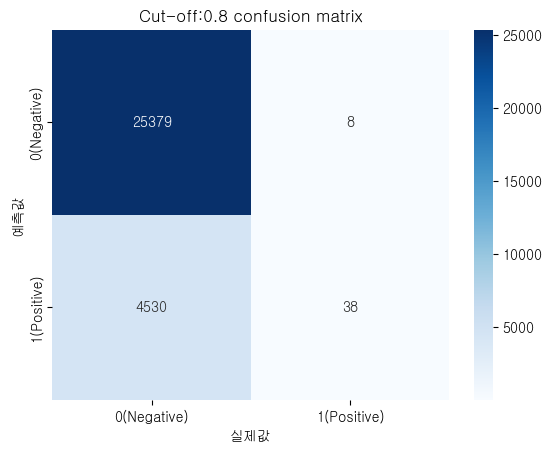

True Positive:38
True Negative:25379
False Positive:8
False Negative:4530


,Metric,Value,CI_Lower,CI_Upper
0,Sensitivity,0.831874,0.568479,1.095269
1,Specificity,99.968488,99.946654,99.990321
2,Accuracy,84.850609,84.444590,85.256628
3,PPV,82.608696,71.655115,93.562276
4,NPV,84.854057,84.447764,85.260351
5,F_1_score,0.823580,NaN,NaN


In [22]:
# cut-off 0.8
cm = confusion_matrix(test_copy['TARGET1'], test_copy['prob_8'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('Cut-off:0.8 confusion matrix')
plt.xticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.yticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.show()

print(f"True Positive:{len(test_copy[(test_copy['prob_8']==1)&(test_copy['TARGET1']==1)])}")
print(f"True Negative:{len(test_copy[(test_copy['prob_8']==0)&(test_copy['TARGET1']==0)])}")
print(f"False Positive:{len(test_copy[(test_copy['prob_8']==1)&(test_copy['TARGET1']==0)])}")
print(f"False Negative:{len(test_copy[(test_copy['prob_8']==0)&(test_copy['TARGET1']==1)])}")

performance(TP=38,TN=25379,FP=8,FN=4530,BETA=1)

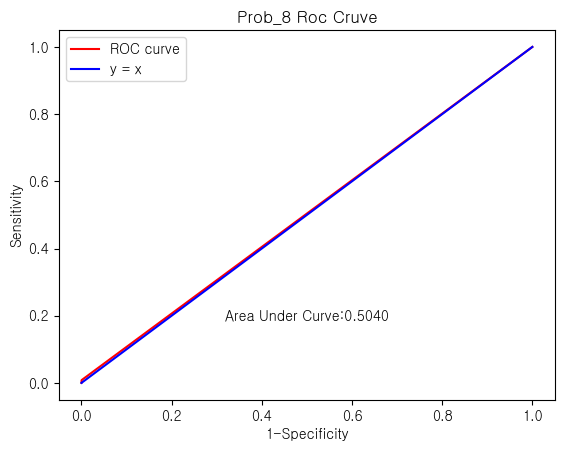

In [19]:
# roc curve, auc
fpr, tpr, thresholds = roc_curve(test_copy['TARGET1'], test_copy['prob_8'])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(test_copy['TARGET1'], test_copy['prob_8'])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('Prob_8 Roc Cruve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

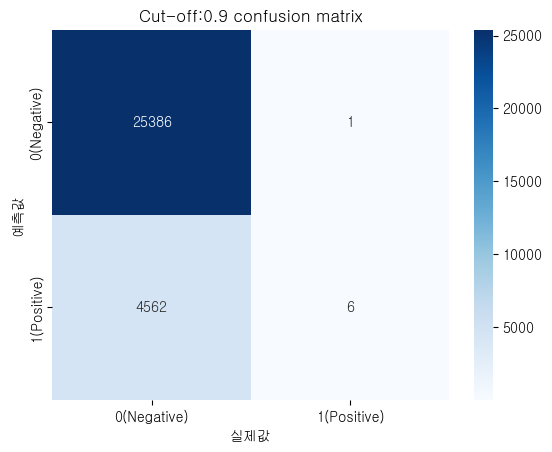

True Positive:6
True Negative:25386
False Positive:1
False Negative:4562


,Metric,Value,CI_Lower,CI_Upper
0,Sensitivity,0.131349,0.026317,0.236380
1,Specificity,99.996061,99.988341,100.003781
2,Accuracy,84.767151,84.360215,85.174086
3,PPV,85.714286,59.791323,111.637249
4,NPV,84.766929,84.359944,85.173915
5,F_1_score,0.131148,NaN,NaN


In [24]:
# cut-off 0.9
cm = confusion_matrix(test_copy['TARGET1'], test_copy['prob_9'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('Cut-off:0.9 confusion matrix')
plt.xticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.yticks([0.5,1.5],['0(Negative)','1(Positive)'])
plt.show()

print(f"True Positive:{len(test_copy[(test_copy['prob_9']==1)&(test_copy['TARGET1']==1)])}")
print(f"True Negative:{len(test_copy[(test_copy['prob_9']==0)&(test_copy['TARGET1']==0)])}")
print(f"False Positive:{len(test_copy[(test_copy['prob_9']==1)&(test_copy['TARGET1']==0)])}")
print(f"False Negative:{len(test_copy[(test_copy['prob_9']==0)&(test_copy['TARGET1']==1)])}")

performance(TP=6,TN=25386,FP=1,FN=4562,BETA=1)

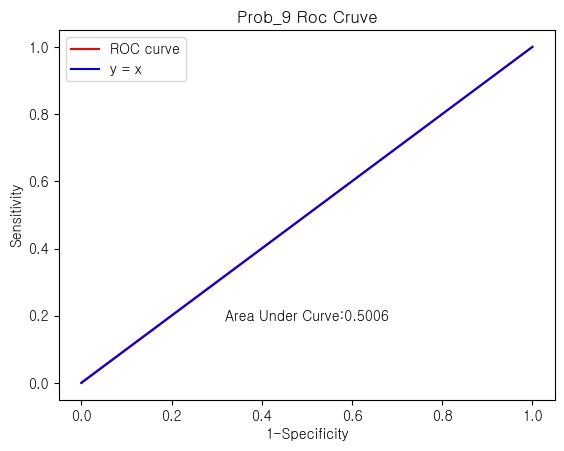

In [20]:
# roc curve, auc
fpr, tpr, thresholds = roc_curve(test_copy['TARGET1'], test_copy['prob_9'])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(test_copy['TARGET1'], test_copy['prob_9'])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('Prob_9 Roc Cruve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()